<a href="https://colab.research.google.com/github/Gokul-rao/Machine-Learning-Trained-Models/blob/master/SVMClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
original_data=pd.read_csv(
    '/content/adult.csv',
    names=["Age","Workclass","fnlwgt","Education","Education-Num","Marital Status","Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss","Hours per week","Country","Target"],
    sep=r'\s*,\s*',engine='python',na_values="?")
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


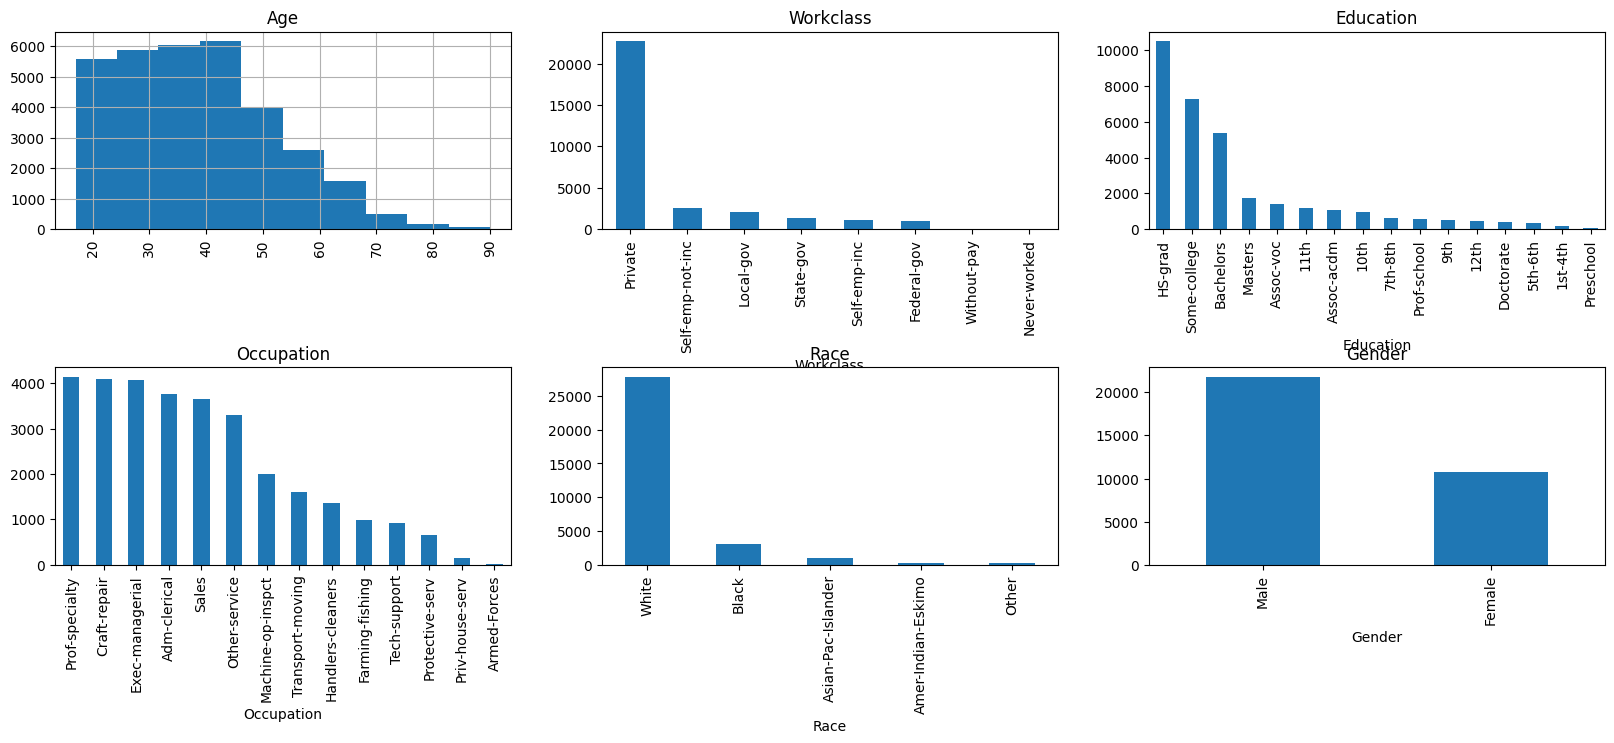

In [ ]:

import matplotlib.pyplot as plt
import math
%matplotlib inline

fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)

for i, column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):

  ax=fig.add_subplot(rows,cols,i+1)
  ax.set_title(column)
  np.object=object
  if original_data.dtypes[column]==object:

    original_data[column].value_counts().plot(kind="bar",axes=ax)
  else:
    original_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()


In [ ]:
import sklearn.preprocessing as preprocessing

le=preprocessing.LabelEncoder()
original_data['Occupation']=le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,90,NaN,77053,HS-grad,9,Widowed,14,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,3,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,14,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,6,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,9,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
original_data['Target']=le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,22,Private,310152,Some-college,10,Never-married,10,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32560,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
original_data.Target.unique()


array([0, 1])

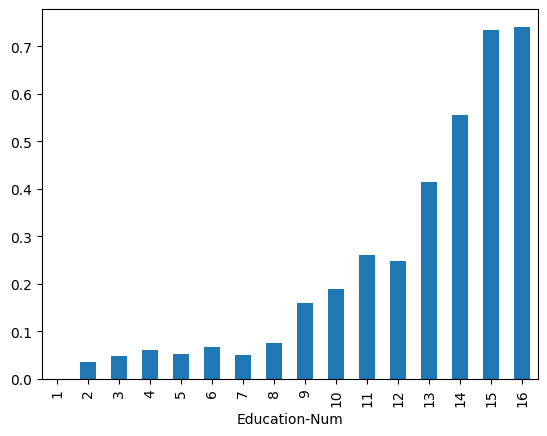

In [ ]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [ ]:
#Building Models

from sklearn.model_selection import train_test_split

#Features input x
x=original_data[['Education-Num','Occupation']]
y=original_data['Target']

#splitting it 80% of training and 20% for testing for better accuracy
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVC

#declaring classifier with no tuning
classifier=SVC()

#fit the data. This is where the SVM will learn
classifier.fit(x_train,y_train)

#predicting the result and giving accuracy
score=classifier.score(x_test,y_test)

print(score)

0.7871948410870566


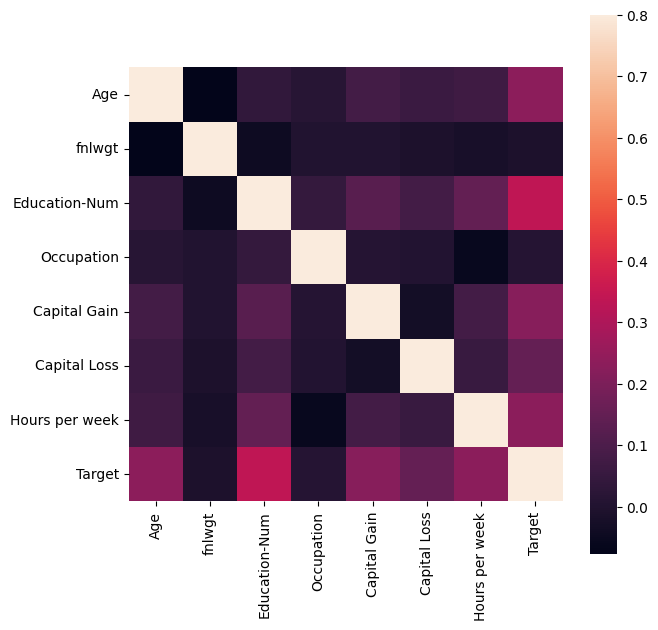

In [ ]:
import seaborn as sns

corrmat=original_data.select_dtypes(include=[float,int]).corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [ ]:
original_data['Race']=le.fit_transform(original_data['Race'].astype(str))
original_data['Gender']=le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status']=le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education']=le.fit_transform(original_data['Education'].astype(str))

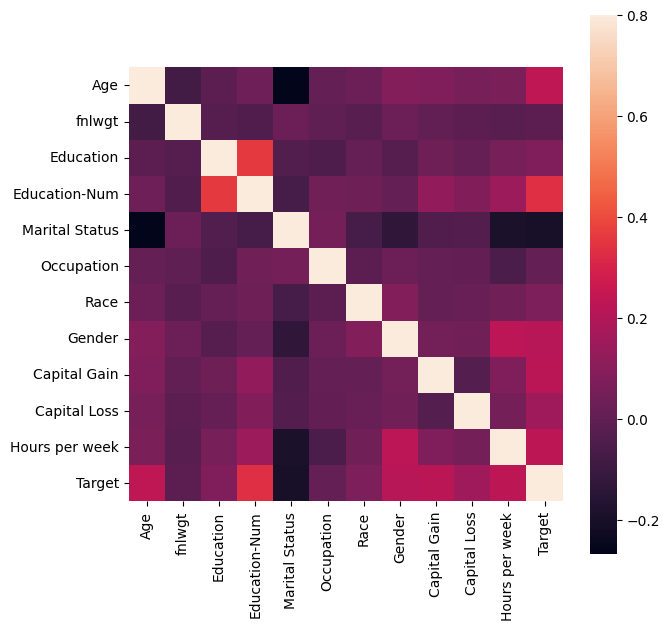

In [ ]:
corrmat=original_data.select_dtypes(include=[float,int]).corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

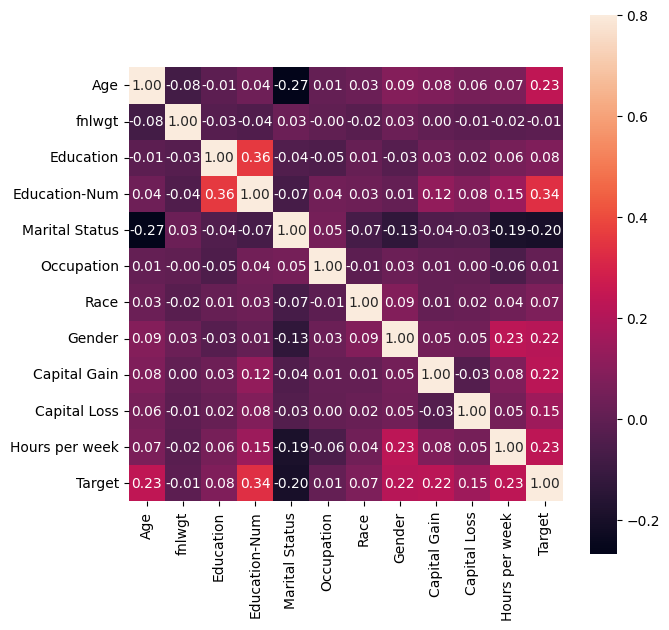

In [ ]:
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

In [ ]:
#Age is more corelated, so we can add age and train for more accuracy
x=original_data[['Education-Num','Occupation','Age','Gender']]
y=original_data['Target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
classifier=SVC()

classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.793489943190542


In [ ]:
classifier=SVC(kernel='rbf',C=1.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.793489943190542


In [ ]:
#we can keep tweeking the parameter of a model until satisfy the accuracy called hyperparameter tuning
classifier=SVC(kernel='rbf',C=10.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.7970213419315215


In [ ]:
#Change the kernel type type to linear
classifier=SVC(kernel='linear',C=1.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.7970213419315215
